In [21]:
#priyanshu jha
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
print("Import successfull")

Import successfull


In [22]:
df = pd.read_csv("swiggy.csv")
df.head()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8680 non-null   int64  
 1   Area           8680 non-null   object 
 2   City           8680 non-null   object 
 3   Restaurant     8680 non-null   object 
 4   Price          8680 non-null   float64
 5   Avg ratings    8680 non-null   float64
 6   Total ratings  8680 non-null   int64  
 7   Food type      8680 non-null   object 
 8   Address        8680 non-null   object 
 9   Delivery time  8680 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 678.2+ KB


In [24]:
# A1. Evaluate the intraclass spread and interclass distances between the classes in your dataset.
# Calculating mean of each classes
Price = df['Price']
Rating = df['Total ratings']

centroid1 = np.mean(df['Price'], axis=0)
centroid2 = np.mean(df['Total ratings'], axis=0)

# Calculate spread (standard deviation) for each class
spread1 = np.std(Price)
spread2 = np.std(Rating)

# Calculate the distance between mean vectors between classes
Euclidean_distance = np.linalg.norm(centroid1-centroid2)

print("Price mean            : ",centroid1)
print("Rating_mean           : ",centroid2)
print("Spread of Price       : ",spread1)
print("Spread of Total rating: ",spread2)
print("Euclidean distance    : ",Euclidean_distance)

Price mean            :  348.4444700460829
Rating_mean           :  156.6347926267281
Spread of Price       :  230.92677067442844
Spread of Total rating:  391.4254645182708
Euclidean distance    :  191.8096774193548


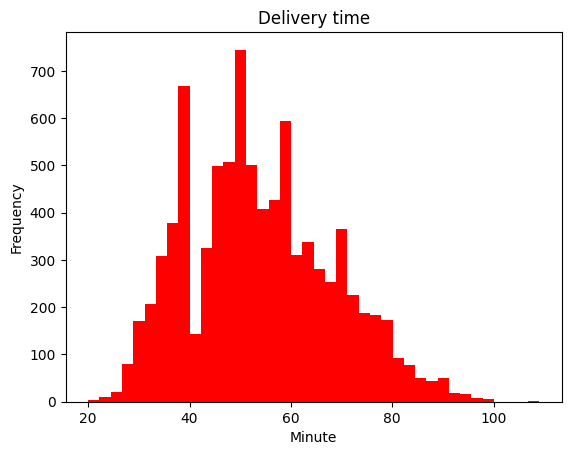

In [25]:
# A2. Take any feature from your dataset. Observe the density pattern for that feature by plotting the histogram.
# Select delivery time as feature
Delivery = df['Delivery time']
plt.hist(Delivery, bins=40, color='red')
plt.xlabel('Minute')
plt.ylabel('Frequency')
plt.title('Delivery time')
plt.show()

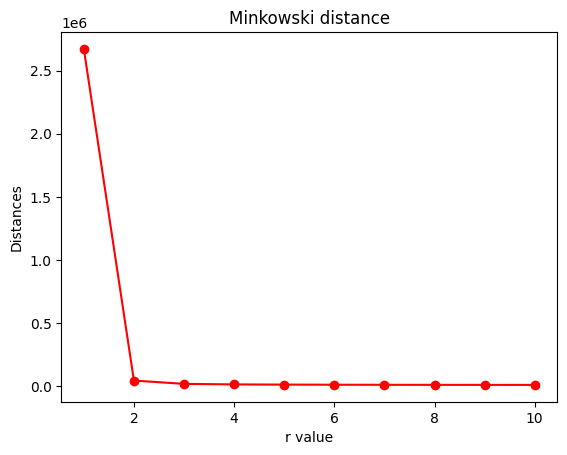

In [26]:
# A3. Take any two feature vectors from your dataset. Calculate the Minkwoski distance with r from 1 to 10.
#  Make a plot of the distance and observe the nature of this graph.
from scipy.spatial import distance
r_value = range(1,11)
vect1 = df['Price']
vect2 = df['Total ratings']
distances = [distance.minkowski(vect1,vect2,r) for r in r_value]

plt.plot(r_value,distances, 'o-r')
plt.xlabel('r value')
plt.ylabel('Distances')
plt.title('Minkowski distance')
plt.show()

In [27]:
# Applying label encoding the dataset
from sklearn.preprocessing import LabelEncoder

# Assuming you have a DataFrame called 'data' with categorical columns
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
categorical_cols = ['Area', 'City', 'Restaurant', 'Food type', 'Address']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [28]:
# A4. Divide dataset in your project into two parts –train & test set.
#  To accomplish this, use the train-test_split() function available in SciKit. 
from sklearn.model_selection import train_test_split
input_features = df
output = df[['Price', 'Total ratings']]
X_train,X_test,y_train,y_test = train_test_split(input_features ,output,test_size=0.3, random_state=42)

In [29]:
# A5. Train a kNN classifier (k =3)using the training set obtained from above exercise.
from sklearn.neighbors import KNeighborsClassifier
knn_classifier_Price = KNeighborsClassifier(n_neighbors=3)
knn_classifier_Total_rating = KNeighborsClassifier(n_neighbors=3)
knn_classifier_Price.fit(X_train,y_train['Price'])
knn_classifier_Total_rating.fit(X_train,y_train['Total ratings'])

KNeighborsClassifier(n_neighbors=3)

In [30]:
# A6. Test the accuracy of the kNNusing the test set obtained from above exercise
np1 = knn_classifier_Price.score(X_test,y_test['Price'])
np2 = knn_classifier_Total_rating.score(X_test,y_test['Total ratings'])

In [31]:
print(f'Accuracy of price        : {np1:.2f}')
print(f'Accuracy of Total ratings: {np2:.2f}')

Accuracy of price        : 0.16
Accuracy of Total ratings: 0.37


In [32]:
#  Use the predict() function to study the prediction behavior of the classifier for test vectors.>>> neigh.predict(X_test)
predict1 = knn_classifier_Price.predict(X_test)
predict2 = knn_classifier_Total_rating.predict(X_test)

In [33]:
print(f'Prediction 1: {predict1}')
print(f'Prediction 2: {predict2}')

Prediction 1: [200. 100. 160. ... 200. 250. 120.]
Prediction 2: [ 80  50 500 ...  20  80 100]


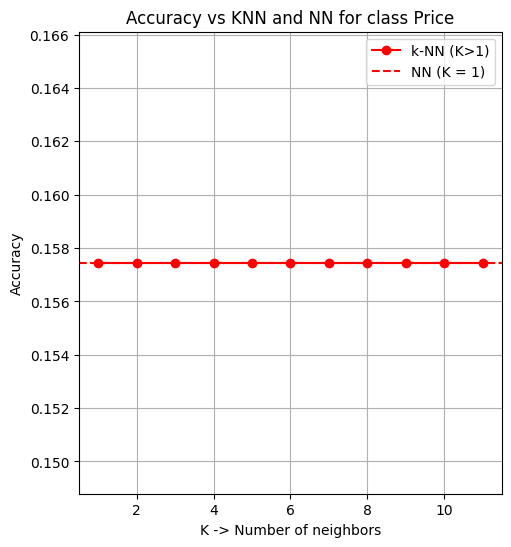

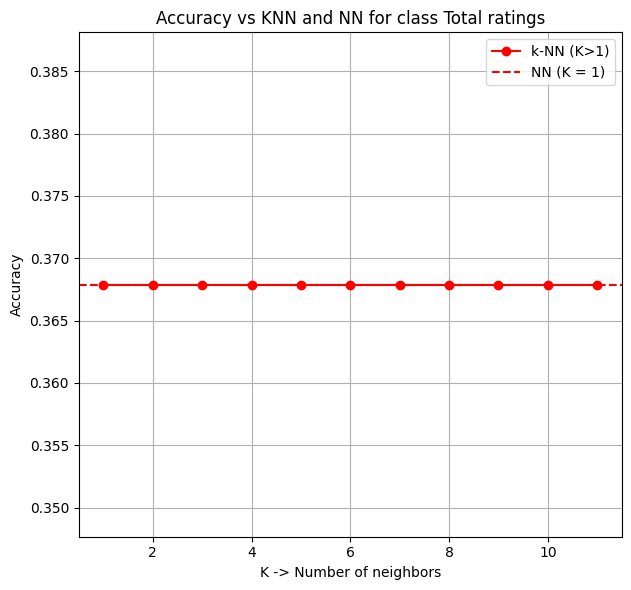

In [34]:
#  Make k = 1 to implement NN classifier and compare the results with kNN (k = 3). 
# Vary k from 1 to 11 and make an accuracy plot.
k_values = list(range(1,12))
knn_accuracies_Price = []
knn_accuracies_Total_rating = []
nn_accuracies_Price = []
nn_accuracies_Total_rating = []

for i in k_values:
    # setting the neighbors
    knn_classifier_Price = KNeighborsClassifier(n_neighbors=3)
    knn_classifier_Total_rating = KNeighborsClassifier(n_neighbors=3)
    # Training each class 
    knn_classifier_Price.fit(X_train,y_train['Price'])
    knn_classifier_Total_rating.fit(X_train,y_train['Total ratings'])
    # Calculating accuracy of each class
    np1 = knn_classifier_Price.score(X_test,y_test['Price'])
    np2 = knn_classifier_Total_rating.score(X_test,y_test['Total ratings'])
    # Storing the accuracies in their respective lists
    knn_accuracies_Price.append(np1)
    knn_accuracies_Total_rating.append(np2)

# setting the neighbors
nn_classifier_Price = KNeighborsClassifier(n_neighbors=3)
nn_classifier_Total_rating = KNeighborsClassifier(n_neighbors=3)
# Training each class 
nn_classifier_Price.fit(X_train,y_train['Price'])
nn_classifier_Total_rating.fit(X_train,y_train['Total ratings'])# Calculating accuracy of each class
nn_accuracies_Price = knn_classifier_Price.score(X_test,y_test['Price'])
nn_accuracies_Total_rating = knn_classifier_Total_rating.score(X_test,y_test['Total ratings'])

# For class Price
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(k_values, knn_accuracies_Price, 'o-r',label='k-NN (K>1)')
plt.axhline(y=nn_accuracies_Price, color='r', linestyle='--', label='NN (K = 1)')
plt.xlabel('K -> Number of neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy vs KNN and NN for class Price')
plt.legend()
plt.grid(True)

# For class Total ratings
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(k_values, knn_accuracies_Total_rating, 'o-r',label='k-NN (K>1)')
plt.axhline(y=nn_accuracies_Total_rating, color='r', linestyle='--', label='NN (K = 1)')
plt.xlabel('K -> Number of neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy vs KNN and NN for class Total ratings')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [35]:
from sklearn.metrics import confusion_matrix, classification_report
# For k-NN classifier k>1 'Price'

knn_predictions_price = knn_classifier_Price.predict(X_test)
knn_confusion_matrix_price = confusion_matrix(y_test['Price'],knn_predictions_price)
knn_classification_report_price = classification_report(y_test['Price'],knn_predictions_price)

# For k-NN classfiers k>1 'Total ratings'
knn_predictions_Total_rating = knn_classifier_Total_rating.predict(X_test)
knn_confusion_matrix_Total_rating = confusion_matrix(y_test['Total ratings'],knn_predictions_Total_rating)
knn_classification_report_Total_rating = classification_report(y_test['Total ratings'],knn_predictions_Total_rating)

# For NN classifier k=1 'Price'
nn_predictions_price = knn_classifier_Price.predict(X_test)
nn_confusion_matrix_price = confusion_matrix(y_test['Price'],nn_predictions_price)
nn_classification_report_price = classification_report(y_test['Price'],nn_predictions_price)
# For NN classfiers k=1 'Total ratings'
nn_predictions_Total_rating = knn_classifier_Total_rating.predict(X_test)
nn_confusion_matrix_Total_rating = confusion_matrix(y_test['Total ratings'],nn_predictions_Total_rating)
nn_classification_report_Total_rating = classification_report(y_test['Total ratings'],nn_predictions_Total_rating)


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: Undefined

In [36]:

print("k-NN confusion matrix for Price\n",knn_confusion_matrix_price)
print("\nk-NN classification report  of Price\n",knn_classification_report_price)

k-NN confusion matrix for Price
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

k-NN classification report  of Price
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00         1
        10.0       0.00      0.00      0.00         0
        15.0       0.00      0.00      0.00         0
        20.0       0.00      0.00      0.00         0
        30.0       0.00      0.00      0.00         0
        40.0       0.00      0.00      0.00         0
        45.0       0.00      0.00      0.00         0
        48.0       0.00      0.00      0.00         1
        50.0       0.00      0.00      0.00         4
        60.0       0.00      0.00      0.00         1
        65.0       0.00      0.00      0.00        

In [37]:

print("k-NN confusion matrix for Total rating\n",knn_confusion_matrix_Total_rating)
print("\nk-NN classification report  of Total rating\n",knn_classification_report_Total_rating)


k-NN confusion matrix for Total rating
 [[148  67 161  84   6   0   0   0]
 [ 95  52  85  64   4   0   0   0]
 [205  64 582  77   6   1   0   0]
 [185  91 138 150  19   7   0   0]
 [ 57  28  32  40  13   8   0   0]
 [ 39  15  17  33  13  13   0   0]
 [  0   0   2   0   0   1   0   0]
 [  0   0   0   0   0   0   2   0]]

k-NN classification report  of Total rating
               precision    recall  f1-score   support

          20       0.20      0.32      0.25       466
          50       0.16      0.17      0.17       300
          80       0.57      0.62      0.60       935
         100       0.33      0.25      0.29       590
         500       0.21      0.07      0.11       178
        1000       0.43      0.10      0.16       130
        5000       0.00      0.00      0.00         3
       10000       0.00      0.00      0.00         2

    accuracy                           0.37      2604
   macro avg       0.24      0.19      0.20      2604
weighted avg       0.37      0.37    

In [38]:

print("NN confusion matrix for Price\n",nn_confusion_matrix_price)
print("\nNN classification report  of Price\n",nn_classification_report_price)


NN confusion matrix for Price
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

NN classification report  of Price
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00         1
        10.0       0.00      0.00      0.00         0
        15.0       0.00      0.00      0.00         0
        20.0       0.00      0.00      0.00         0
        30.0       0.00      0.00      0.00         0
        40.0       0.00      0.00      0.00         0
        45.0       0.00      0.00      0.00         0
        48.0       0.00      0.00      0.00         1
        50.0       0.00      0.00      0.00         4
        60.0       0.00      0.00      0.00         1
        65.0       0.00      0.00      0.00         0
 

In [39]:

print("NN confusion matrix for Total rating\n",nn_confusion_matrix_Total_rating)
print("\nNN classification report  of Total rating\n",nn_classification_report_Total_rating)

NN confusion matrix for Total rating
 [[148  67 161  84   6   0   0   0]
 [ 95  52  85  64   4   0   0   0]
 [205  64 582  77   6   1   0   0]
 [185  91 138 150  19   7   0   0]
 [ 57  28  32  40  13   8   0   0]
 [ 39  15  17  33  13  13   0   0]
 [  0   0   2   0   0   1   0   0]
 [  0   0   0   0   0   0   2   0]]

NN classification report  of Total rating
               precision    recall  f1-score   support

          20       0.20      0.32      0.25       466
          50       0.16      0.17      0.17       300
          80       0.57      0.62      0.60       935
         100       0.33      0.25      0.29       590
         500       0.21      0.07      0.11       178
        1000       0.43      0.10      0.16       130
        5000       0.00      0.00      0.00         3
       10000       0.00      0.00      0.00         2

    accuracy                           0.37      2604
   macro avg       0.24      0.19      0.20      2604
weighted avg       0.37      0.37      0.

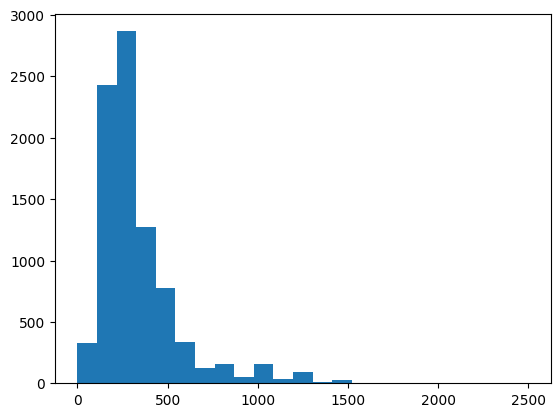

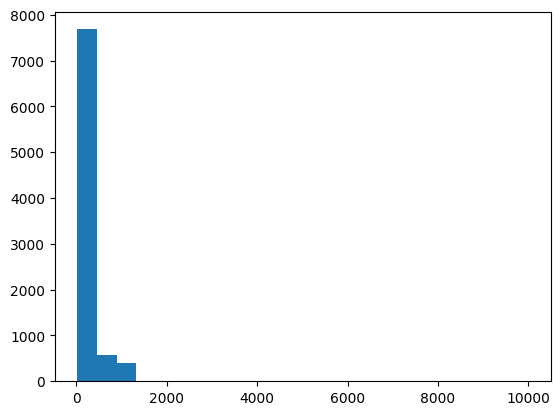

In [40]:
plt.hist(df['Price'],bins=23)
# plt.bar('Total rating',df['Total ratings'], color='blue', marker=2)
plt.show()

plt.hist(df['Total ratings'],bins=23)
plt.show()